# Imports

In [2]:
from importlib import reload
import json
import logging
import time
from argparse import ArgumentParser
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import numpy as np

# __Experiment 2__
## DeepEns vs EdgeNES

In [ ]:
# optimal epochs 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70

# archs numbers 0, 10, 11
# [0.473, 0.4571, 0.4658, 0.468, 0.4552, 0.4631, 0.4705, 0.4652, 0.4667, 0.4753, 0.487, 0.4954, 0.4961, 0.4963]
# archs numbers 12, 13, 14
# [0.4544, 0.4458, 0.4592, 0.456, 0.4434, 0.4536, 0.4513, 0.4459, 0.4584, 0.4839, 0.4499, 0.4689, 0.4491, 0.4719]
# archs numbers 15, 16, 17
# [0.4722, 0.4705, 0.4734, 0.4672, 0.4696, 0.4745, 0.4689, 0.474, 0.4742, 0.4869, 0.488, 0.495, 0.4858, 0.4931]
# archs numbers 18, 19, 0
# [0.4073, 0.4245, 0.4221, 0.4159, 0.4177, 0.4203, 0.4279, 0.4203, 0.4216, 0.4197, 0.4414, 0.4641, 0.4661, 0.471]
# archs numbers 10, 15, 17
# [0.4588, 0.4413, 0.4337, 0.4369, 0.4454, 0.468, 0.4487, 0.4518, 0.4447, 0.4847, 0.4796, 0.4757, 0.4816, 0.4819]

In [ ]:
# hypernet epochs: 15, 30, 45, 60, 75, 90, 105, 120, 135, 150

# lamdas 0, 2, 4
# 0 : [0.4712, 0.4572, 0.4621, 0.4767, 0.4569, 0.4562, 0.4665, 0.4903, 0.4947, 0.4928]
# lamdas 0, 2, 4
# 1 : [0.433, 0.4427, 0.4493, 0.456, 0.4351, 0.4618, 0.4604, 0.4335, 0.4481, 0.4731]
# lamdas 0, 2, 4
# 2 : [0.4348, 0.4288, 0.4275, 0.4277, 0.4684, 0.4669, 0.4556, 0.4723, 0.435, 0.4701]
# lamdas 0, 2, 4
# 3 : [0.5119, 0.5107, 0.4962, 0.4864, 0.4934, 0.4946, 0.4808, 0.4841, 0.5011, 0.4901]
# lamdas 1, 2, 3
# 4 : [0.4988, 0.4927, 0.5087, 0.511, 0.5071, 0.5027, 0.5031, 0.507, 0.5042, 0.5121]

In [22]:
deepEns_epochs = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])[:-4]
deepEns_results = np.array([[0.4588, 0.4413, 0.4337, 0.4369, 0.4454, 0.468, 0.4487, 0.4518, 0.4447, 0.4847, 0.4796, 0.4757, 0.4816, 0.4819],
                   [0.4544, 0.4458, 0.4592, 0.456, 0.4434, 0.4536, 0.4513, 0.4459, 0.4584, 0.4839, 0.4499, 0.4689, 0.4491, 0.4719],
                   [0.4722, 0.4705, 0.4734, 0.4672, 0.4696, 0.4745, 0.4689, 0.474, 0.4742, 0.4869, 0.488, 0.495, 0.4858, 0.4931],
                   [0.4073, 0.4245, 0.4221, 0.4159, 0.4177, 0.4203, 0.4279, 0.4203, 0.4216, 0.4197, 0.4414, 0.4641, 0.4661, 0.471],
                   [0.4588, 0.4413, 0.4337, 0.4369, 0.4454, 0.468, 0.4487, 0.4518, 0.4447, 0.4847, 0.4796, 0.4757, 0.4816, 0.4819]])[:, :-4]

edgeNes_epochs = np.array([15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
edgeNes_results = np.array([[0.4712, 0.4572, 0.4621, 0.4767, 0.4569, 0.4562, 0.4665, 0.4903, 0.4947, 0.4928],
                   [0.433, 0.4427, 0.4493, 0.456, 0.4351, 0.4618, 0.4604, 0.4335, 0.4481, 0.4731],
                   [0.4348, 0.4288, 0.4275, 0.4277, 0.4684, 0.4669, 0.4556, 0.4723, 0.435, 0.4701],
                   [0.5119, 0.5107, 0.4962, 0.4864, 0.4934, 0.4946, 0.4808, 0.4841, 0.5011, 0.4901],
                   [0.4988, 0.4927, 0.5087, 0.511, 0.5071, 0.5027, 0.5031, 0.507, 0.5042, 0.5121]])

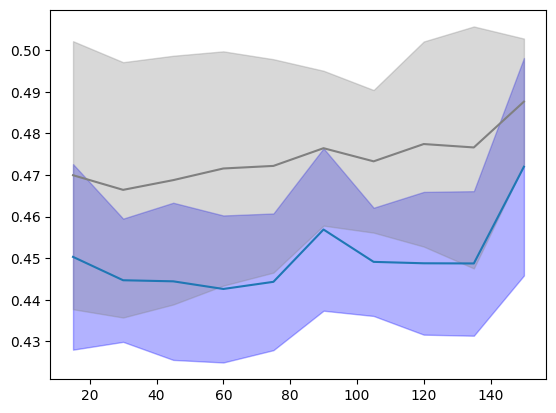

In [24]:
deepEns_mean = deepEns_results.mean(axis=0)
deepEns_std = deepEns_results.std(axis=0)

edgeNes_mean = edgeNes_results.mean(axis=0)
edgeNes_std = edgeNes_results.std(axis=0)

plt.plot(deepEns_epochs * 3, deepEns_mean)
plt.fill_between(deepEns_epochs * 3, deepEns_mean - deepEns_std, deepEns_mean + deepEns_std, alpha=0.3, color='blue')
plt.plot(edgeNes_epochs, edgeNes_mean, color='grey')
plt.fill_between(edgeNes_epochs, edgeNes_mean - edgeNes_std, edgeNes_mean + edgeNes_std, alpha=0.3, color='grey')

# Getting dataset

In [3]:
dataset = "cifar100"

dataset_train, dataset_valid = datasets.get_dataset(dataset)        

Files already downloaded and verified
Files already downloaded and verified


# Graph for DeepEns vs EdgeNES

## Common edges

In [16]:
arcs = []

with open(f'checkpoints/cifar100/optimal/arc.json') as f:
    arc = json.load(f) # оптимальная архитектура в виде словаря
    arcs.append(arc)

lambds = [1, 2, 3]
for lamb in lambds:
    with open(f'checkpoints/cifar100/random_edges/lambd={lamb}/arc4.json') as f:
        arc = json.load(f)
        arcs.append(arc)

all_intersections = []
for arc in arcs:
    intersections = []
    for other_arc in arcs:
        intersections.append(utils.common_edges(arc, other_arc))

    all_intersections.append(intersections)
intersections_with_opt = all_intersections[0]
print(intersections_with_opt)

[4, 1, 2, 3]


Text(0.5, 0, 'lambda')

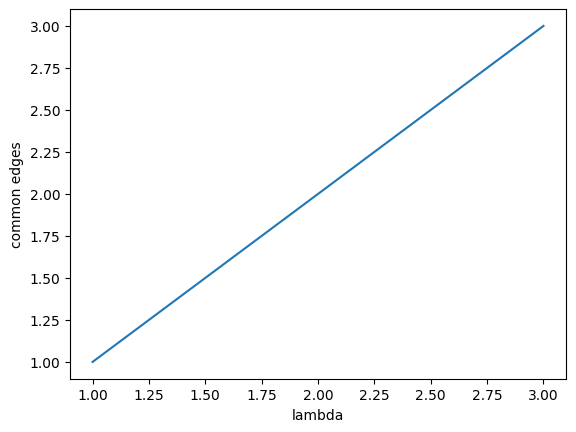

In [17]:
y = intersections_with_opt[1:]
plt.plot(lambds, y)
plt.ylabel('common edges')
plt.xlabel('lambda')

# Write archs

In [14]:
for lambd in np.linspace(0, 4, 20):
    arc = trainer.get_arch(lam)
    json.dump(arc, open(f'checkpoints/CIFAR100/hypernet/try1/arc_lam{lambd}.json', 'w'))

## Retrain

In [4]:
layers = 2
batch_size = 96
log_frequency = 20
channels = 16
unrolled = False
visualization = False
dataset = 'cifar100'

In [18]:
from engine.retrain import train, validate, fixed_arch

ModuleNotFoundError: No module named 'utils'

In [4]:
from retrain import train, validate, fixed_arch
# reload(train)

config = {
'layers' : layers,
'batch_size' : batch_size,
'log_frequency' : log_frequency,
'epochs' : 50,
'aux_weight' : 0.4,
'drop_path_prob' : 0.1,
'workers' : 4,
'grad_clip' : 5.,
'save_folder' : f"./checkpoints/{dataset}/",
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset_train, dataset_valid = datasets.get_dataset(dataset, cutout_length=16)

best_top1s = {}
for lambd in [1, 2, 3]:
    for num in [1, 2, 3, 4]:
        if lambd == 0:
            folder = config['save_folder'] + "optimal/"
        else:
            folder = config['save_folder'] + f"random_edges/lambd={lambd}/"
        print(folder)
        with fixed_arch(folder + f'arc{1}.json'):
        # with fixed_arch(args.save_folder + "/arc.json"):
            if dataset == 'fashionMNIST':
                model = CNN(32, 1, 36, 10, config['layers'], auxiliary=True)
            if dataset == 'cifar100':
                model = CNN(32, 3, 36, 100, config['layers'], auxiliary=True)

        criterion = nn.CrossEntropyLoss()

        model.to(device)
        criterion.to(device)

        optimizer = torch.optim.SGD(model.parameters(), 0.025, momentum=0.9, weight_decay=3.0E-4)
        lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, config['epochs'], eta_min=1E-6)

        train_loader = torch.utils.data.DataLoader(dataset_train,
                                                batch_size=config['batch_size'],
                                                shuffle=True,
                                                num_workers=config['workers'],
                                                pin_memory=True)
        valid_loader = torch.utils.data.DataLoader(dataset_valid,
                                                batch_size=config['batch_size'],
                                                shuffle=False,
                                                num_workers=config['workers'],
                                                pin_memory=True)

        best_top1 = 0.
        for epoch in range(config['epochs']):
            drop_prob = config['drop_path_prob'] * epoch / config['epochs']
            model.drop_path_prob(drop_prob)

            # training
            train(config, train_loader, model, optimizer, criterion, epoch)

            # validation
            cur_step = (epoch + 1) * len(train_loader)
            top1 = validate(config, valid_loader, model, criterion, epoch, cur_step)
            best_top1 = max(best_top1, top1)

            lr_scheduler.step()

        torch.save(model.state_dict(), folder + f"mod{num}.json")
        # torch.save(model.state_dict(), args.save_folder + "/mod.json")
        print("Final best Prec@1 = {:.4%}".format(best_top1))
        best_top1s.update({f'lambd={lambd} arc{num}' : best_top1})
        print(best_top1s)

Files already downloaded and verified
Files already downloaded and verified
./checkpoints/cifar100/random_edges/lambd=1/
[2024-04-01 18:25:14] Fixed architecture: {'reduce_n2_p0': 'maxpool', 'reduce_n2_p1': 'sepconv5x5', 'reduce_n3_p0': 'sepconv5x5', 'reduce_n3_p1': 'sepconv5x5', 'reduce_n3_p2': 'sepconv3x3', 'reduce_n4_p0': 'dilconv3x3', 'reduce_n4_p1': 'skipconnect', 'reduce_n4_p2': 'sepconv5x5', 'reduce_n4_p3': 'sepconv5x5', 'reduce_n5_p0': 'maxpool', 'reduce_n5_p1': 'maxpool', 'reduce_n5_p2': 'maxpool', 'reduce_n5_p3': 'sepconv5x5', 'reduce_n5_p4': 'maxpool', 'reduce_n2_switch': [0], 'reduce_n3_switch': [2], 'reduce_n4_switch': [0], 'reduce_n5_switch': [4]}
[2024-04-01 18:25:14] Epoch 0 LR 0.025000
[2024-04-01 18:25:21] Train: [  1/50] Step 000/520 Loss 6.504 Prec@(1,5) (1.0%, 7.3%)
[2024-04-01 18:25:22] Train: [  1/50] Step 020/520 Loss 6.388 Prec@(1,5) (1.8%, 8.6%)
[2024-04-01 18:25:22] Train: [  1/50] Step 040/520 Loss 6.248 Prec@(1,5) (3.0%, 12.1%)
[2024-04-01 18:25:22] Train: 

KeyboardInterrupt: 

In [1]:
for ww in ['yes', 'no']:
    for wt in ['no']:
        for l in [1, 2, 3]:
            print(ww, wt, l, best_top1s[f'lambd={l}, ww={ww}, wt={wt}'])

NameError: name 'best_top1s' is not defined

# Hypernet retrain

In [7]:
from retrain import train, validate, fixed_arch
# reload(train)

config = {
'layers' : layers,
'batch_size' : batch_size,
'log_frequency' : log_frequency,
'epochs' : 50,
'aux_weight' : 0.4,
'drop_path_prob' : 0.1,
'workers' : 4,
'grad_clip' : 5.,
'save_folder' : f"./checkpoints/{dataset}/",
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset_train, dataset_valid = datasets.get_dataset(dataset, cutout_length=16)

best_top1s = {}
it = -1
for lambd in np.linspace(0, 4, 20):
    it += 1
    if it % 2 == 1 or it < 6:
        continue
    folder = f"random_edges/lambd={lambd}/"
    print(folder)
    with fixed_arch(f'checkpoints/CIFAR100/hypernet/try1/arc_lam{lambd}.json'):
    # with fixed_arch(args.save_folder + "/arc.json"):
        if dataset == 'fashionMNIST':
            model = CNN(32, 1, 36, 10, config['layers'], auxiliary=True)
        if dataset == 'cifar100':
            model = CNN(32, 3, 36, 100, config['layers'], auxiliary=True)

    criterion = nn.CrossEntropyLoss()

    model.to(device)
    criterion.to(device)

    optimizer = torch.optim.SGD(model.parameters(), 0.025, momentum=0.9, weight_decay=3.0E-4)
    lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, config['epochs'], eta_min=1E-6)

    train_loader = torch.utils.data.DataLoader(dataset_train,
                                            batch_size=config['batch_size'],
                                            shuffle=True,
                                            num_workers=config['workers'],
                                            pin_memory=True)
    valid_loader = torch.utils.data.DataLoader(dataset_valid,
                                            batch_size=config['batch_size'],
                                            shuffle=False,
                                            num_workers=config['workers'],
                                            pin_memory=True)

    best_top1 = 0.
    for epoch in range(config['epochs']):
        drop_prob = config['drop_path_prob'] * epoch / config['epochs']
        model.drop_path_prob(drop_prob)

        # training
        train(config, train_loader, model, optimizer, criterion, epoch)

        # validation
        cur_step = (epoch + 1) * len(train_loader)
        top1 = validate(config, valid_loader, model, criterion, epoch, cur_step)
        best_top1 = max(best_top1, top1)

        lr_scheduler.step()

    torch.save(model.state_dict(), f'checkpoints/CIFAR100/hypernet/try1/mod_lam{lambd}.json')
    # torch.save(model.state_dict(), args.save_folder + "/mod.json")
    print("Final best Prec@1 = {:.4%}".format(best_top1))
    best_top1s.update({f'lambd={lambd}' : best_top1})
    print(best_top1s)

Files already downloaded and verified
Files already downloaded and verified
random_edges/lambd=1.263157894736842/
[2024-04-02 18:58:14] Fixed architecture: {'reduce_n2_p0': 'sepconv5x5', 'reduce_n2_p1': 'sepconv5x5', 'reduce_n3_p0': 'dilconv5x5', 'reduce_n3_p1': 'sepconv5x5', 'reduce_n3_p2': 'sepconv5x5', 'reduce_n4_p0': 'sepconv3x3', 'reduce_n4_p1': 'sepconv5x5', 'reduce_n4_p2': 'sepconv5x5', 'reduce_n4_p3': 'sepconv5x5', 'reduce_n5_p0': 'maxpool', 'reduce_n5_p1': 'sepconv3x3', 'reduce_n5_p2': 'sepconv5x5', 'reduce_n5_p3': 'sepconv5x5', 'reduce_n5_p4': 'maxpool', 'reduce_n2_switch': [1], 'reduce_n3_switch': [1], 'reduce_n4_switch': [0], 'reduce_n5_switch': [4]}
[2024-04-02 18:58:14] Epoch 0 LR 0.025000
[2024-04-02 18:58:19] Train: [  1/50] Step 000/520 Loss 6.512 Prec@(1,5) (0.0%, 5.2%)
[2024-04-02 18:58:20] Train: [  1/50] Step 020/520 Loss 6.394 Prec@(1,5) (2.0%, 8.2%)
[2024-04-02 18:58:20] Train: [  1/50] Step 040/520 Loss 6.293 Prec@(1,5) (2.8%, 11.4%)
[2024-04-02 18:58:21] Train:

In [47]:
res = {'lambd=0.0' : 0.6126000193595886,'lambd=0.4210' : 0.6129000202178955, 'lambd=0.8421' : 0.613600, 'lambd=1.263157894736842': 0.6138000170707703, 'lambd=1.6842105263157894': 0.6134000166893006, 'lambd=2.1052631578947367': 0.6146000204086304, 'lambd=2.526315789473684': 0.6135000175476074, 'lambd=2.9473684210526314': 0.6146000196456909, 'lambd=3.3684210526315788': 0.6139000211715698, 'lambd=3.789473684210526': 0.6154000207901001}

Text(0.5, 0, '$\\lambda$')

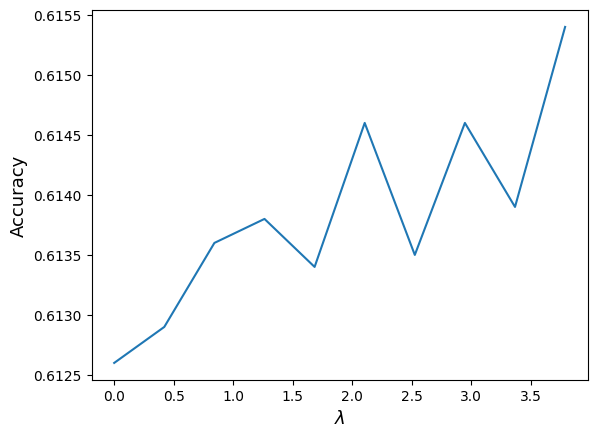

In [48]:
lambds = []
accs = []
font = { 'size' : 13 }
for lam, acc in res.items():
    lambds.append(float(lam[6:]))
    accs.append(acc)
plt.plot(lambds, accs)
plt.ylabel('Accuracy', fontdict=font)
plt.xlabel(r'$\lambda$', fontdict=font)

## Validation

In [21]:
from retrain import train, validate, fixed_arch
import numpy as np
from glob import glob
from nni.retiarii.oneshot.pytorch.utils import AverageMeter
from torch.utils.tensorboard import SummaryWriter

logger = logging.getLogger('nni')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
writer = SummaryWriter()
n_chosen = 1

config = {
'layers' : 2,
'batch_size' : 96,
'log_frequency' : 30,
'epochs' : 10,
'aux_weight' : 0.4,
'drop_path_prob' : 0.1,
'workers' : 4,
'grad_clip' : 5.,
}

dataset_train, dataset_valid = datasets.get_dataset("cifar100", cutout_length=16)

res_dict_accur = {}
models = []

# chosen_lambdas = np.random.choice(8, size=3, replace=False) # выбранные lambda
chosen_lambdas = ['0.42105263157894735']

print(chosen_lambdas)

folder = 'checkpoints/cifar100/hypernet/try1/*'

for dir in glob(folder):
    # print(dir)
    # if dir.split('\\')[-1] != 'optimal' and dir.split('\\')[-1] != 'random' and dir.split('\\')[-1] != 'random_edges' and int(dir.split('\\')[-1].split('=')[-1]) in chosen_lambdas:
    lam = (dir.split('\\')[-1])[7:-5]
    if lam in chosen_lambdas and (dir.split('\\')[-1])[0:3] == 'arc':
        print(dir)
        with fixed_arch(folder[:-1] + f'/arc_lam{lam}.json'):
            model = CNN(32, 3, 36, 100, config['layers'], auxiliary=True, n_chosen=n_chosen)
        model.to(device)
        model.load_state_dict(torch.load(folder[:-1] + f'/mod_lam{lam}.json'))
        model.eval()
            
        models.append(model)
    elif dir.split('\\')[-1] == 'optimal' and 0 in chosen_lambdas:
        print(dir)
        folder = dir + "/"
        with fixed_arch(folder[:-1] + f'/mod_lam{lam}.json'):
            model = CNN(32, 3, 36, 100, config['layers'], auxiliary=True, n_chosen=n_chosen)
        model.to(device)
        model.load_state_dict(torch.load(folder + "mod1.json"))
        model.eval()
            
        models.append(model)
         

print(f"Models in ensemble: {len(models)}")

if len(models) != 0:
    valid_loader = torch.utils.data.DataLoader(dataset_valid,
                                                batch_size=config['batch_size'],
                                                shuffle=False,
                                                num_workers=config['workers'],
                                                pin_memory=True)
    criterion = nn.CrossEntropyLoss()

    top1 = AverageMeter("top1")
    top5 = AverageMeter("top5")
    losses = AverageMeter("losses")

    # validation
    softmax = nn.Softmax(dim=1)
    for step, (X, y) in enumerate(valid_loader):
            X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)
            bs = X.size(0)

            probabilities = softmax(models[0](X))
            for i in range(1, len(models)):
                probabilities += softmax(models[i](X))
            probabilities = probabilities / len(models)
            loss = criterion(probabilities, y)

            accuracy = utils.accuracy(probabilities, y, topk=(1, 5))
            losses.update(loss.item(), bs)
            top1.update(accuracy["acc1"], bs)
            top5.update(accuracy["acc5"], bs)

            if step % config['log_frequency'] == 0 or step == len(valid_loader) - 1:
                logger.info(
                    "Valid: Step {:03d}/{:03d} Loss {losses.avg:.3f} "
                    "Prec@(1,5) ({top1.avg:.1%}, {top5.avg:.1%})".format(
                        step, len(valid_loader) - 1, losses=losses,
                        top1=top1, top5=top5))

    logger.info("Final best Prec@1 = {:.4%}".format(top1.avg))

    # res_dict_accur[chosen_lambdas] = top1.avg
    print(top1.avg)

Files already downloaded and verified
Files already downloaded and verified
['0.42105263157894735']
checkpoints/cifar100/hypernet/try1\arc_lam0.42105263157894735.json
[2024-04-03 21:12:59] Fixed architecture: {'reduce_n2_p0': 'sepconv5x5', 'reduce_n2_p1': 'sepconv5x5', 'reduce_n3_p0': 'dilconv5x5', 'reduce_n3_p1': 'sepconv5x5', 'reduce_n3_p2': 'sepconv5x5', 'reduce_n4_p0': 'sepconv3x3', 'reduce_n4_p1': 'sepconv5x5', 'reduce_n4_p2': 'sepconv5x5', 'reduce_n4_p3': 'sepconv5x5', 'reduce_n5_p0': 'maxpool', 'reduce_n5_p1': 'sepconv3x3', 'reduce_n5_p2': 'sepconv5x5', 'reduce_n5_p3': 'sepconv5x5', 'reduce_n5_p4': 'maxpool', 'reduce_n2_switch': [1], 'reduce_n3_switch': [1], 'reduce_n4_switch': [0], 'reduce_n5_switch': [4]}
Models in ensemble: 1
[2024-04-03 21:13:02] Valid: Step 000/104 Loss 3.993 Prec@(1,5) (65.6%, 86.5%)
[2024-04-03 21:13:03] Valid: Step 030/104 Loss 4.047 Prec@(1,5) (60.6%, 87.4%)
[2024-04-03 21:13:03] Valid: Step 060/104 Loss 4.047 Prec@(1,5) (60.3%, 87.3%)
[2024-04-03 21:13

In [59]:
import numpy as np

# Входные значения
data = [0.5881, 0.5984, 0.6396, 0.5892, 0.6037]

# Расчет среднего значения
mean = np.mean(data)
print("Среднее значение:", mean * 100)

# Расчет дисперсии
variance = np.std(data)
print("Дисперсия:", variance * 100)


Среднее значение: 60.38
Дисперсия: 1.881733243581565
